<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# GitHub for Teams

_Author: Noelle - DSI DEN_  

-----

## Setup - Both Partners
Necessary package and data imports. Both partners should run these cells.

In [13]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the data.
admissions = pd.read_csv('./data/admissions.csv')

# drop missings
admissions.dropna(axis=0, inplace=True)

admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [3]:
# split into testing and training sets
features = ['gre', 'gpa', 'prestige']
X = admissions[features] # feature matrix
y = admissions['admit'] # target vector

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
X.shape

(397, 3)

array([0, 1], dtype=int64)

---
## Partner A
**ONLY** Partner A work on this section!

1. Visualize any correlation between `gre` and `gpa`. Interpret the plot to see if there is any correlation.

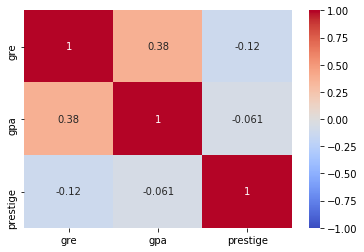

In [14]:
sns.heatmap(X.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot = True);

>**Answer:**  

`gre` and `gpa` are positively correlated with each other. In fact those are the only 2 variables that have any sort of correlation with each other. So if we were to hold all constant, an increase in `gpa` by one unit would lead to a .38 increase in the gre and vice versa?

2. Predict `admit` using a decision tree. Find the accuracy of the training and testing sets and display the confusion matrix for the testing set.

Train score: 0.9932659932659933
Test score: 0.64


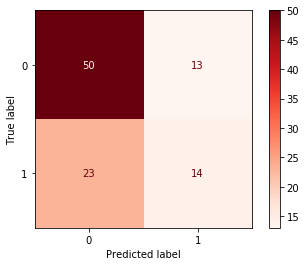

In [30]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

print('Train score:', tree.score(X_train, y_train))
print('Test score:', tree.score(X_test, y_test))
preds = tree.predict(X_test)

plot_confusion_matrix(tree, X_test, y_test, cmap='Reds');

3. Is there any evidence of high bias or high variance in your model? If so, how do you know and what are some strategies you could do to fix this error?

>**Answer:**  


---
## Partner B
**ONLY** Partner B work on this section!

1. Visualize any correlation between `gre` and `admit`. Interpret the plot to see if there is any correlation.

In [14]:
X_train

,gre,gpa,prestige
16,780.0,3.87,4.0
66,740.0,3.62,4.0
382,540.0,3.51,2.0
7,400.0,3.08,2.0
19,540.0,3.81,1.0
...,...,...,...
71,300.0,2.92,4.0
106,700.0,3.56,1.0
273,660.0,3.32,1.0
351,620.0,3.43,3.0


Text(0.5, 1.0, 'Partner B Changes')

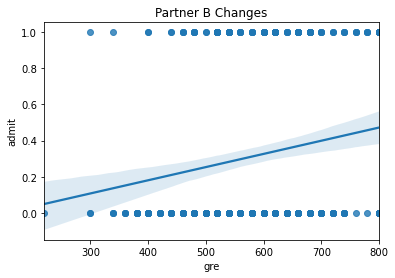

In [27]:
sns.regplot(admissions['gre'],admissions['admit'])
plt.title('Partner B Changes')

>**Answer:**  


2. Predict `admit` using a random forest model. Find the accuracy of the training and testing sets and display the confusion matrix for the testing set.

In [ ]:
# Random Forest Classifier
param=[{'clss__n_estimators': [1100],
   'clss__min_samples_split': [2 ,3],
   'clss__min_samples_leaf' : [4,5],
   'clss__max_features': ['sqrt'],
   'clss__ccp_alpha' : [0.01, 0.0],
   'clss__max_depth': [None,6]}]

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf.score(X_train,y_train)


0.9932659932659933

In [25]:
rf.score(X_test,y_test)

0.66

3. Is there any evidence of high bias or high variance in your model? If so, how do you know and what are some strategies you could do to fix this error?

>**Answer:**  
YES!!! Apply regularization with params